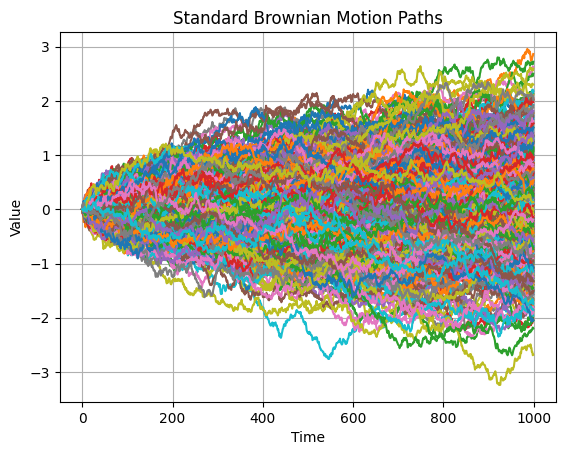

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1000  # Number of points
k = 500    # Number of paths
mu = 0
sigma = 1**(1/2)

# Generate k*n standard normal samples
Z = np.random.normal(loc=mu, scale=sigma, size=(k, n)) #creates a numpy array containing k samples (Random Vectors or sequence of RVs or stoch process) of size n (parameter)

# Initialize paths
W = np.zeros((k, n))

#k: The number of independent samples (paths). - number of Random Vectors
#n: The number of data points in each sample. - length of the Random Vector

# numpy array X[start row : end row, column]
# X[0:k,0:n] maximum

# Simulate Brownian Motion paths
for i in range(1, n):

    #print(f'W[:, {i-1}] = {W[:, i-1]}')
    #print(f'Z[:, {i}] = {Z[:, i]}')
    #print(f'np.sqrt(1/{n}) * Z[:, {i}] = {np.sqrt(1/n) * Z[:, i]}\n')

    W[:, i] = W[:, i-1] + np.sqrt(1/n) * Z[:, i]

    #print(f'W[:, {i}] = {W[:, i]}\n')
    #print(f'=======end of i={i}=============')
    

# Plot the paths
for i in range(k):
    plt.plot(W[i], label=f"Path {i+1}")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Standard Brownian Motion Paths")
#plt.legend()
plt.grid(True)
plt.show()


Showing that the increments of Brownian Motion is stationary of the AI generated solution
i.e. W(t) - W(s) ~ N(0,sigma^2*(t-s)) , 0 < s < t

E[ Z[t] ] = 0.057023475105842436
Var[ Z[t] ] = 1.0287748081497534
E[ W[t] ] = 0.7764120285389824
Var[ W[t] ] = 0.5149743935601784
E[W(t) - W(s)] = 0.011393249713377802
Var[W(t) - W(s)] = 0.04575562799212516
Var[W(t) - W(s)] = sigma^2 * (t - s) = 49


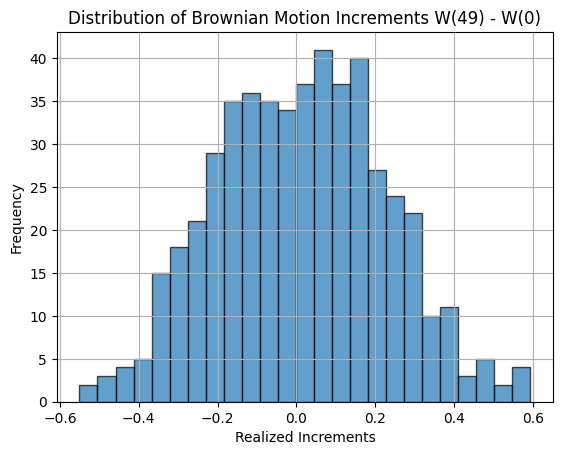

In [349]:

arr_diff = np.array([]) # initialize array
t=49
s=0

for row in np.arange(start=0, stop=len(W)):
    # W(t) - W(s) ~ N(0,sigma^2*(t-s)), 0 < s < t
    arr_diff = np.append(arr_diff, W[row,t] - W[row,s])


print(f'E[ Z[t] ] = {np.mean(Z[t])}')
print(f'Var[ Z[t] ] = {np.var(Z[t])}')

print(f'E[ W[t] ] = {np.mean(W[t])}')
print(f'Var[ W[t] ] = {np.var(W[t])}')
    
print(f'E[W(t) - W(s)] = {np.mean(arr_diff)}')
print(f'Var[W(t) - W(s)] = {np.var(arr_diff)}')
print(f'Var[W(t) - W(s)] = sigma^2 * (t - s) = {t-s}')

# Plot the histogram of the generated increments
plt.hist(arr_diff, bins=25, edgecolor='black', alpha=0.7, density=False)
plt.xlabel("Realized Increments")
plt.ylabel("Frequency")
plt.title(f"Distribution of Brownian Motion Increments W({t}) - W({s})")
plt.grid(True)
plt.show()


Define Brownian Motion using CGU Qidi Peng's definition

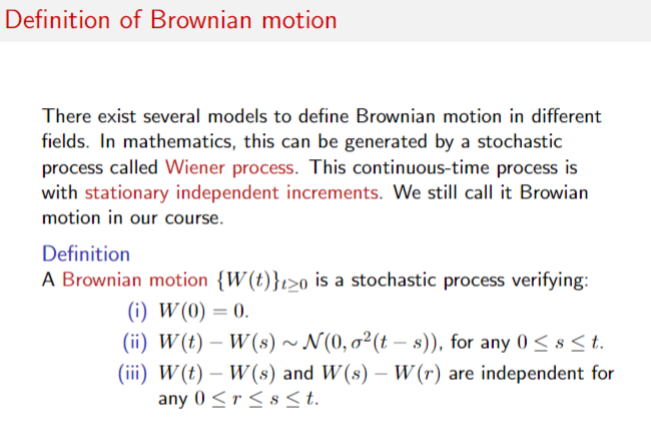

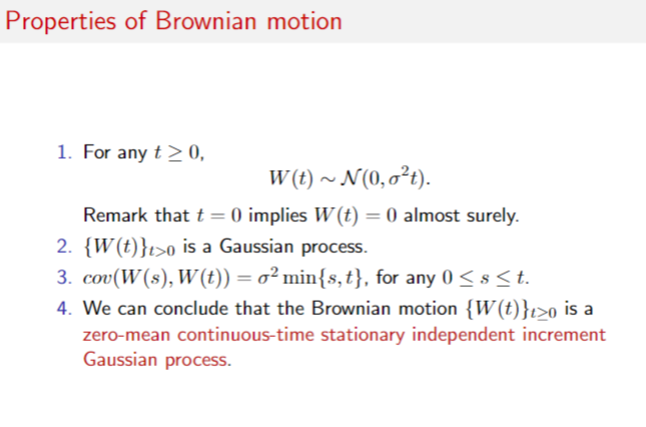

In [ ]:
X = np.zero([])

In [312]:
len(X[0])

10

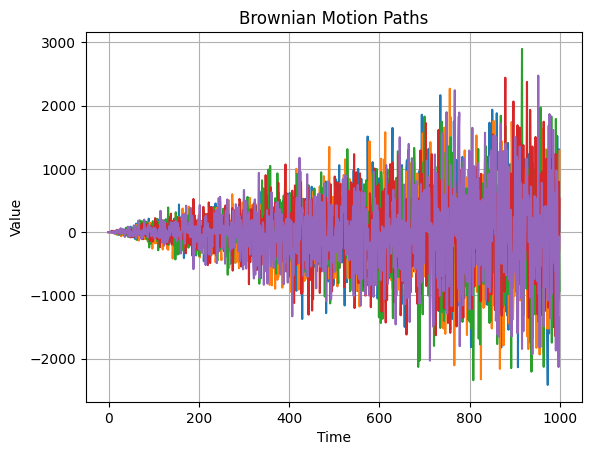

In [320]:
t = 1000 # number of samples or time index or size of random vector
k = 5 # number of paths

mu = 0
sigma = 1


# create a function that creates a single row array or the stoch process {W(t)} t>=0

def weiner_process(mu, sigma, t):
    W = np.array([])
    
    for t in np.arange(start=0, stop=t):
        
        W = np.append(W, np.random.normal(loc=mu, scale=t*sigma**2))

    return W


# use the function to create a numpy array of size (k,t) containing k realizations of the stoch process

X = np.zeros((k,t))

for path in np.arange(start=0, stop=k):
    X[path] = weiner_process(mu,sigma,t)


# Plot the paths
for i in range(k):
    plt.plot(X[i], label=f"Path {i+1}")

plt.xlabel("Time")
plt.ylabel("Value")


plt.title("Brownian Motion Paths")
#plt.legend()
plt.grid(True)
plt.show()



In [317]:
[index for index in np.arange(start=0, stop=len(X[0]))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

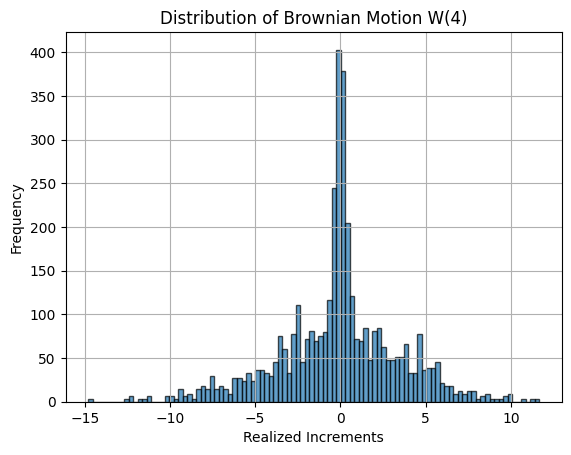

In [303]:
t = 4

for row in np.arange(start=0, stop=len(X)):
    # W(t) ~ N(0,sigma^2 * t), t > 0
    arr_diff = np.append(arr_diff, X[row,t])




# Plot the histogram of the generated increments
plt.hist(arr_diff, bins=100, edgecolor='black', alpha=0.7, density=False)
plt.xlabel("Realized Increments")
plt.ylabel("Frequency")
plt.title(f"Distribution of Brownian Motion W({t})")
plt.grid(True)
plt.show()


CGU Peng's Definition of Brownian Motion

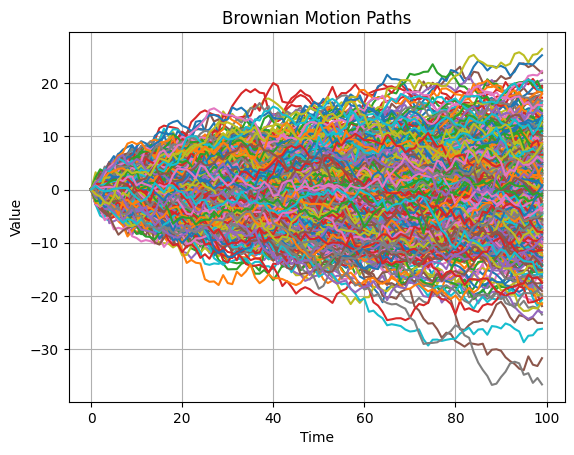

In [7]:
# define X(t) = W(t) - W(t-1) for t = 0,1,2,3,.....
# X(1) = W(1) - W(0) = W(1)
# X(t) ~ N(0, sigma^2 * (t - (t-1))) = N(0, sigma^2)

k = 500 # paths
t = 100 # time index

mu = 0
sigma = 1

X = np.random.normal(loc=mu, scale=sigma, size=(k, t)) # RV increments


# define B(t) = X(t) + X(t-1) + X(t-2) + ... + X(1) , summation of stationary independent increments W(t)-W(t-1), a path

B = np.zeros((k, t)) #initialize 

for time_index in np.arange(start=1, stop=t):
    
    B[:, time_index] = B[:, time_index - 1] + X[:, time_index]



# Plot the paths
for i in range(k):
    plt.plot(B[i], label=f"Path {i+1}")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Brownian Motion Paths")
#plt.legend()
plt.grid(True)
plt.show()

Showing that the increments of Brownian Motion is stationary - CGU definition

E[B(t) - B(s)] = -0.08866169981525401
Var[B(t) - B(s)] = 19.05380296182804
theoretical Var[B(t) - B(s)] = sigma^2 * (t - s) = 19


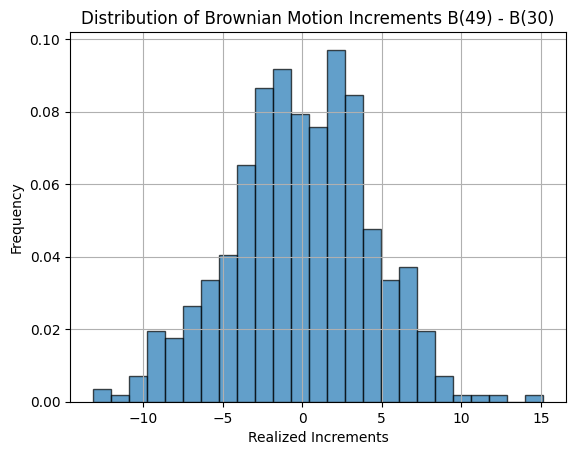

In [8]:
arr_diff = np.array([]) # initialize array
t=49
s=30

for row in np.arange(start=0, stop=len(B)):
    # for 0 < s < t
    # B(t) - B(s) = X(t) + X(t-1) + ... + X(0) - ( X(s) + X(s-1) + ... + X(0) )
    #             = X(t) + X(t-1) + ... + X(s+1)
    #             = W(t) - W(t-1) + W(t-1) - W(t-2) + ... + W(s+1) - W(s)
    #             = W(t) - W(s) ~ N(0, sigma^2)

    arr_diff = np.append(arr_diff, B[row,t] - B[row,s])

    
print(f'E[B(t) - B(s)] = {np.mean(arr_diff)}')
print(f'Var[B(t) - B(s)] = {np.var(arr_diff)}')
print(f'theoretical Var[B(t) - B(s)] = sigma^2 * (t - s) = {(t-s)*sigma**2}')

# Plot the histogram of the generated increments
plt.hist(arr_diff, bins=25, edgecolor='black', alpha=0.7, density=True)
plt.xlabel("Realized Increments")
plt.ylabel("Frequency")
plt.title(f"Distribution of Brownian Motion Increments B({t}) - B({s})")
plt.grid(True)
plt.show()


E[B(t-s)] = -0.31708439608432515
Var[B(t-s)] = 19.478718885708254
theoretical Var[B(t-s)] = sigma^2 * (t - s) = 19


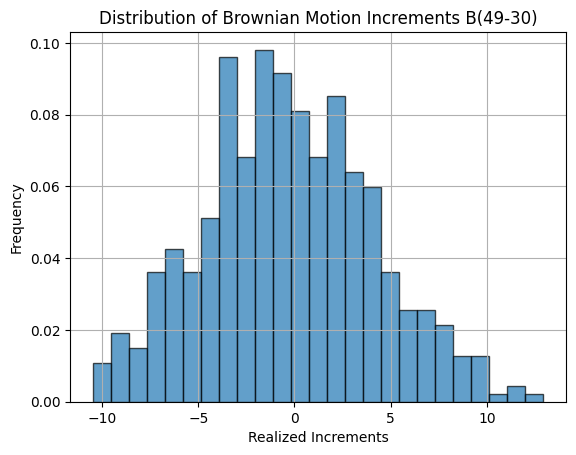

In [17]:
# B(t) = X(t) + X(t-1) + X(t-2) + ... + X(2) + X(1)
#      = W(t) - W(t-1) + W(t-1) - W(t-2) + W(t-2) - W(t-3) + ... + W(2) - W(1) + W(1) - W(0)
#      = W(t) - W(0)
#      = W(t)
# Brownian motion is the sum of the increments of weiner process


# we know W(t) - W(s) ~ N(0, sigma^2 * (t-s))
# show W(t) - W(s) ~ W(t-s)


arr_diff = np.array([]) # initialize array
t=49
s=30

for row in np.arange(start=0, stop=len(B)):
     
    # B(t-s) = X(t-s) + X(t-s-1) + X(t-s-2) + ... + X(1)
    #        = W(t-s) - W(t-s-1) + W(t-s-1) - W(t-s-2) + W(t-s-2) - W(t-s-3) + ... + W(1) - W(0)
    #        = W(t-s)
    #
    # Theoretically:
    # W(t-s) = W(t-s) - W(0) ~ N( 0, sigma^2 * ((t-s) - 0 ) ) = N(0, sigma^2 * (t-s))
    # 
    # show programatically:
    # B(t-s) ~ N(0, sigma^2 * (t-s))

    
    arr_diff = np.append(arr_diff, B[row,t-s])

    
print(f'E[B(t-s)] = {np.mean(arr_diff)}')
print(f'Var[B(t-s)] = {np.var(arr_diff)}')
print(f'theoretical Var[B(t-s)] = sigma^2 * (t - s) = {(t-s)*sigma**2}')

# Plot the histogram of the generated increments
plt.hist(arr_diff, bins=25, edgecolor='black', alpha=0.7, density=True)
plt.xlabel("Realized Increments")
plt.ylabel("Frequency")
plt.title(f"Distribution of Brownian Motion Increments B({t}-{s})")
plt.grid(True)
plt.show()


as t becomes very large, what happens to the distribution of B(t) ?
Hypothesis: since X(t) is independent and follows a normal distribution, B(t) will follow normal distr as per WLLN

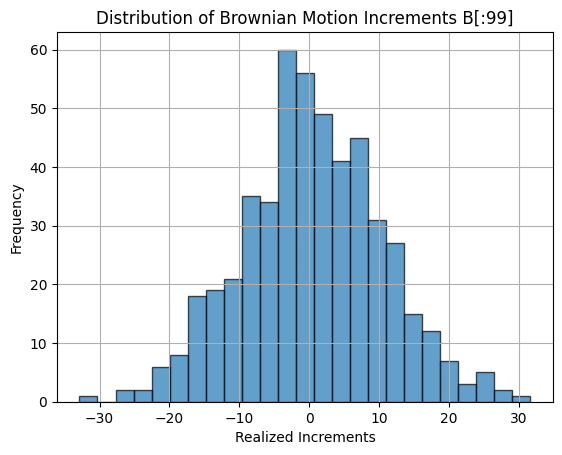

In [44]:
s = 99

# Plot the histogram of the generated increments
plt.hist(B[:,s], bins=25, edgecolor='black', alpha=0.7, density=False)
plt.xlabel("Realized Increments")
plt.ylabel("Frequency")
plt.title(f"Distribution of Brownian Motion Increments B[:{s}]")
plt.grid(True)
plt.show()

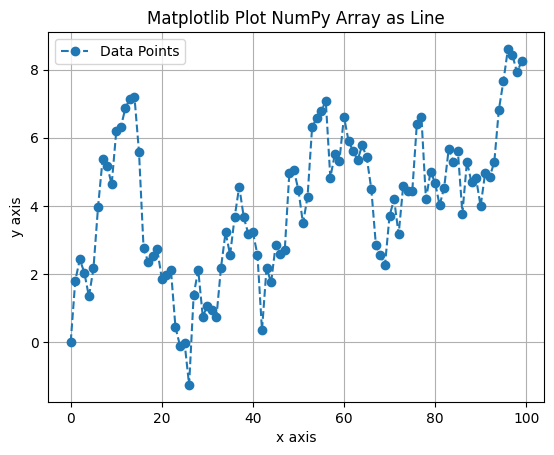

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data coordinates
x = np.arange(start=0, stop=t)
y = B[30]

# Plot the line graph
plt.plot(x, y, linestyle='--', marker='o', label='Data Points')

# Customize the plot
plt.title("Matplotlib Plot NumPy Array as Line")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


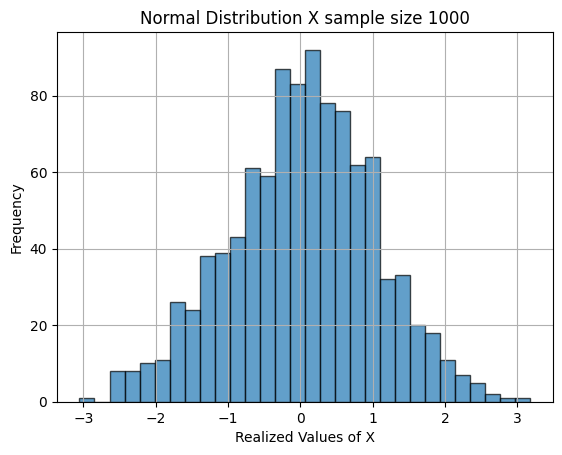

In [55]:
n=1000
mu = 0
sigma = 1

X = np.random.normal(loc=mu, scale=sigma, size=n) # RV increments

# Plot the histogram of the generated increments
plt.hist(X, bins=30, edgecolor='black', alpha=0.7, density=False)
plt.xlabel("Realized Values of X")
plt.ylabel("Frequency")
plt.title(f"Normal Distribution X sample size {n}")
plt.grid(True)
plt.show()



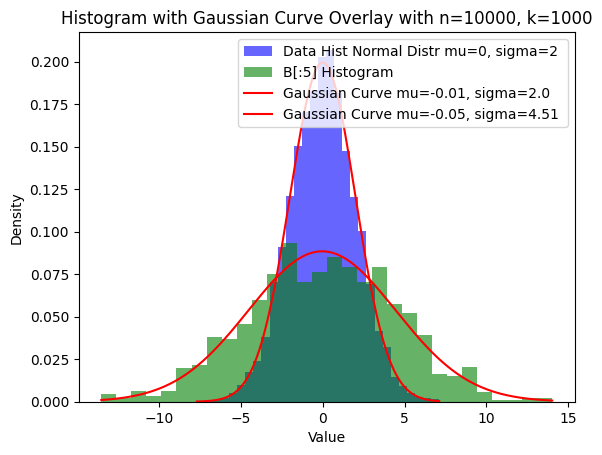

In [192]:
n=10000 #sample size / time index
k = 1000 #random vectors / stoch process / paths

s_time = 5 #time index dummy
s_path = 100 #path index dummy

mu = 0
sigma = 2 #STD

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate random data (replace with your actual data)
data = np.random.normal(loc=mu, scale=sigma, size=n) # X

#Generate BM using numpy array - from previous
X = np.random.normal(loc=mu, scale=sigma, size=(k, n)) # RV increments
B = np.zeros((k,n))

for time_index in np.arange(start=1, stop=n):
    
    B[:, time_index] = B[:, time_index - 1] + X[:, time_index]



# Create a histogram
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label=f'Data Hist Normal Distr mu={mu}, sigma={sigma} ')

# create histogram for B[:,s] - grabbing only the s column
plt.hist(B[:,s_time], bins=30, density=True, alpha=0.6, color='green', label=f'B[:{s_time}] Histogram')



# Overlay the Gaussian distribution curve - based from generated data
x_values = np.linspace(min(data), max(data), n)
mean, std = np.mean(data), np.std(data)
pdf_values = norm.pdf(x_values, loc=mean, scale=std)
plt.plot(x_values, pdf_values, 'r', label=f'Gaussian Curve mu={round(mean,2)}, sigma={round(std,2)}')



# show distribution of B at s_time
#create overlay joint distribution function of independent gaussian distribution - based from generated data
x_values = np.linspace(min(B[:,s_time]), max(B[:,s_time]), n)
mean, std = np.mean(B[:,s_time]), np.std(B[:,s_time])
pdf_values = norm.pdf(x_values, loc=mean, scale=std)
plt.plot(x_values, pdf_values, 'r', label=f'Gaussian Curve mu={round(mean,2)}, sigma={round(std,2)}')


plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Histogram with Gaussian Curve Overlay with n={n}, k={k}')


plt.legend()
plt.show()


In [133]:
B

array([[ 0.00000000e+00,  3.38880655e-02,  4.15733333e-01, ...,
        -1.58233985e+02, -1.58492128e+02, -1.59744917e+02],
       [ 0.00000000e+00,  3.00099890e-01,  1.06107698e+00, ...,
        -6.73179519e+01, -6.71872873e+01, -6.76567060e+01],
       [ 0.00000000e+00, -4.07169369e-01, -1.40650090e+00, ...,
        -6.84573830e+01, -6.81503553e+01, -6.83161856e+01],
       ...,
       [ 0.00000000e+00, -7.81120961e-01, -7.07679173e-01, ...,
        -8.82169057e+01, -8.94835451e+01, -9.12209195e+01],
       [ 0.00000000e+00,  1.88286508e+00,  1.73550209e+00, ...,
         4.72464779e+01,  4.76918068e+01,  5.01087667e+01],
       [ 0.00000000e+00,  1.17199574e+00,  4.06273550e-01, ...,
        -2.41811478e+01, -2.33912119e+01, -2.45539610e+01]])

In [140]:
mean_B

array(1000)

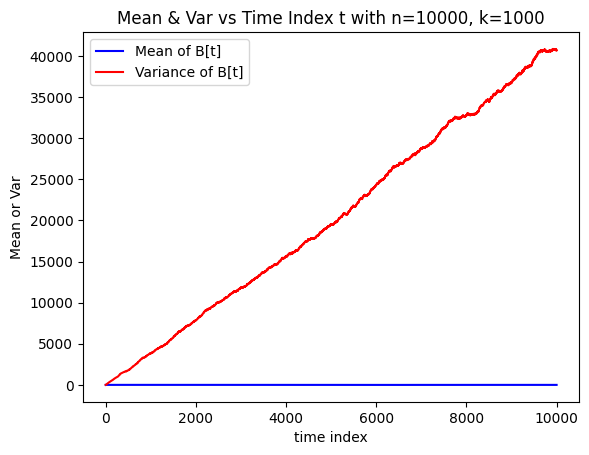

In [193]:

mean_B = np.array([])
var_B = np.array([])

for t in np.arange(start=0, stop=n):
    mean_B = np.append(mean_B, np.mean(B[:,t]))
    var_B = np.append(var_B, np.var(B[:,t]))



x_values = np.arange(start=0, stop=n)

plt.plot(x_values, mean_B, 'b', label=f'Mean of B[t]')
plt.plot(x_values, var_B, 'r', label=f'Variance of B[t]')

plt.xlabel('time index')
plt.ylabel('Mean or Var')
plt.title(f'Mean & Var vs Time Index t with n={n}, k={k}')


plt.legend()
plt.show()

E[m] = 3.9899245313135574
shows that m = sigma**2, hence B follows a distribution N(0, t * sigma**2)


C:\Users\jpkdu\AppData\Local\Temp\ipykernel_13756\1153294906.py:4: RuntimeWarning: invalid value encountered in divide
  m = var_B / x_values


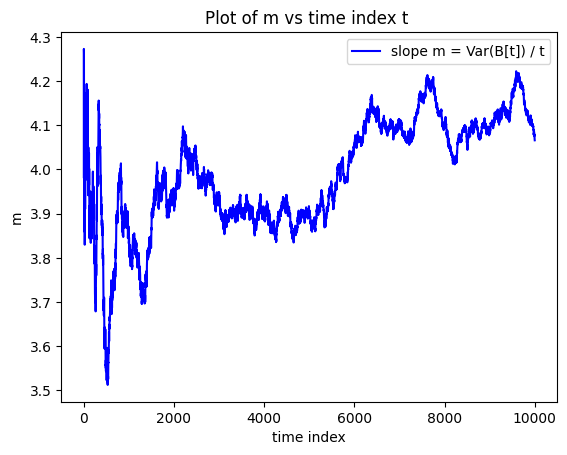

In [196]:
# it is shown that variance of B[t] increases linearly with the time index: Var(B[t]) = m * t
# determine the slope m empirically: m = Var(B[t]) / t

m = var_B / x_values

m = m[~np.isnan(m)] #removes nan in array

print(f'E[m] = {np.mean(m)}')
print(f'shows that m = sigma**2, hence B follows a distribution N(0, t * sigma**2)')

plt.plot(x_values[1:], m, 'b', label=f'slope m = Var(B[t]) / t')

plt.xlabel('time index')
plt.ylabel('m')
plt.title(f'Plot of m vs time index t ')


plt.legend()
plt.show()


Remarks:
- sigma**2 = s_time, in the distribution of B[:,s_time] if k is large
- Bk = X1 + X2 + X3 + ..... + Xs_time ~ (normal)^s_time does not have the same distribution of B[:,s_time]

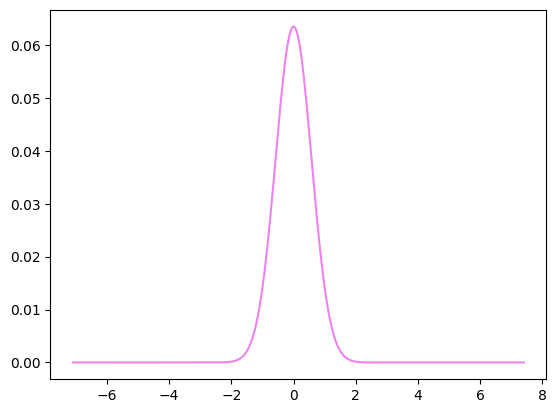

In [131]:
# replicate this by data generation
# show that Bk = X1 + X2 + X3 + ..... + Xs_time ~ (normal)^s_time
# create overlay joint distribution function of independent gaussian distribution - based from theoretical formula
x_values = np.linspace(min(B[:,s_time]), max(B[:,s_time]), n)

pdf_values = norm.pdf(x_values, loc=mu, scale=sigma)*n
plt.plot(x_values, pdf_values, 'violet', label=f'Gaussian Curve mu={round(mu,2)}, sigma={round(sigma,2)}')



In [107]:
B

array([[ 0.00000000e+00,  8.65321666e-01, -9.89796251e-01, ...,
        -6.90589432e+01, -6.84774616e+01, -6.94616078e+01],
       [ 0.00000000e+00,  5.22082246e-01, -1.77023877e-01, ...,
        -9.02118135e+01, -9.09760743e+01, -9.14029774e+01],
       [ 0.00000000e+00, -2.88887038e-01,  1.03387292e+00, ...,
        -1.54586194e+02, -1.53964665e+02, -1.54876287e+02],
       ...,
       [ 0.00000000e+00,  1.22431543e+00,  1.62329428e+00, ...,
        -6.70972213e+01, -6.64057498e+01, -6.52170384e+01],
       [ 0.00000000e+00, -5.34891679e-02,  4.63082288e-01, ...,
        -1.32467714e+02, -1.32930439e+02, -1.32259517e+02],
       [ 0.00000000e+00,  1.01621154e-01,  1.18545468e+00, ...,
         6.79013213e+01,  6.71000989e+01,  6.52473270e+01]])

In [112]:
B[2,:]

array([   0.        ,   -0.28888704,    1.03387292, ..., -154.58619437,
       -153.9646646 , -154.87628668])

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
t = 100  # Number of points
k = 5    # Number of paths
mu = 0
sigma = 1**(1/2)



# Generate k*n standard normal samples
Z = np.random.normal(loc=mu, scale=sigma, size=(k, n)) #creates a numpy array containing k samples (Random Vectors or sequence of RVs or stoch process) of size n (parameter)

# Initialize paths
W = np.zeros((k, n))

#k: The number of independent samples (paths). - number of Random Vectors
#n: The number of data points in each sample. - length of the Random Vector

# numpy array X[start row : end row, column]
# X[0:k,0:n] maximum

# Simulate Brownian Motion paths
for i in range(1, n):

    #print(f'W[:, {i-1}] = {W[:, i-1]}')
    #print(f'Z[:, {i}] = {Z[:, i]}')
    #print(f'np.sqrt(1/{n}) * Z[:, {i}] = {np.sqrt(1/n) * Z[:, i]}\n')

    W[:, i] = np.random.normal(loc=mu, scale=sigma, size=(k, n))

    #print(f'W[:, {i}] = {W[:, i]}\n')
    #print(f'=======end of i={i}=============')
    

# Plot the paths
for i in range(k):
    plt.plot(W[i], label=f"Path {i+1}")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Standard Brownian Motion Paths")
#plt.legend()
plt.grid(True)
plt.show()

NameError: name 'n' is not defined

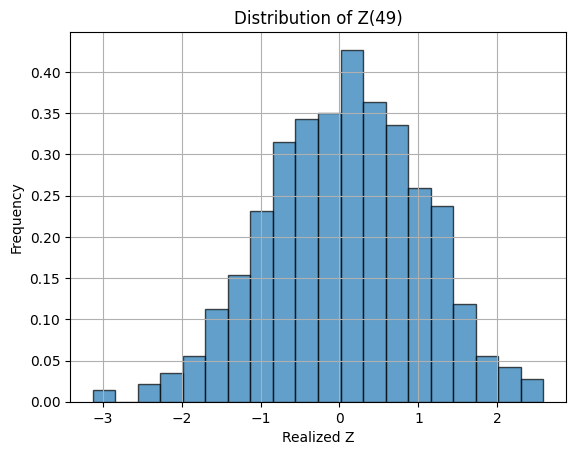

In [201]:
# Plot the histogram of the Z
plt.hist(Z[t], bins=20, edgecolor='black', alpha=0.7, density=True)
plt.xlabel("Realized Z")
plt.ylabel("Frequency")
plt.title(f"Distribution of Z({t})")
plt.grid(True)
plt.show()

In [171]:
y=100
print(np.mean(Z[y]))
print(np.var(Z[y]))

print(np.mean(Z[y]))
print(np.var(Z[y]))

0.055709418544332846
1.124965288020681


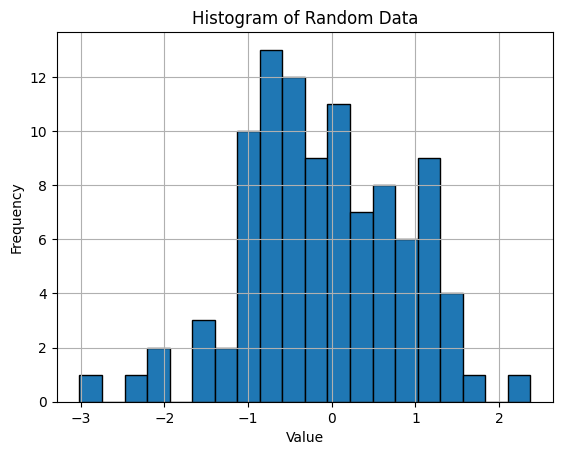

In [52]:
data = Z[0]

hist_values, bin_edges = np.histogram(data, bins=20)

# Create the histogram plot
fig, ax = plt.subplots()
ax.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), edgecolor="black", align="edge")

# Customize the plot (add labels, title, etc.)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Random Data")
plt.grid(True)

# Show the plot
plt.show()

In [43]:
np.zeros((k, n))[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
W.shape

(5, 1000)

In [29]:
W[1:4]

array([[ 0.        ,  0.01292419,  0.01832187, ...,  0.37468967,
         0.38046692,  0.34779424],
       [ 0.        , -0.06893784, -0.08896459, ..., -0.63825481,
        -0.660817  , -0.6030527 ],
       [ 0.        ,  0.02873302,  0.04648328, ...,  0.72189939,
         0.75831187,  0.81248658]])

In [31]:
Z.shape

(5, 1000)